In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [6]:
df_boston = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Q2: Use different histograms to plot features that have right, left and zero skew.

In [75]:
df_boston.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
RAD        1.004815
DIS        1.011781
ZN         2.225666
CHAS       3.405904
CRIM       5.223149
dtype: float64

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

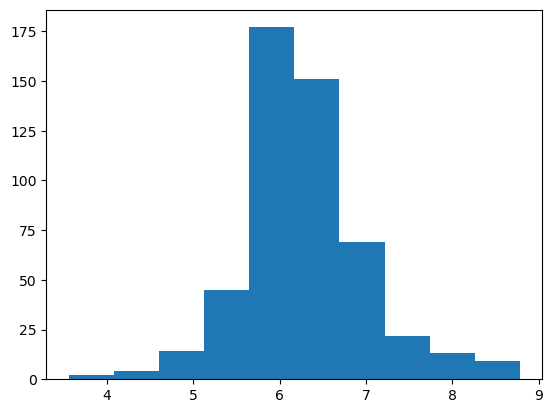

In [51]:
zeroSkew = df_boston['RM']
plt.hist(zeroSkew)

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

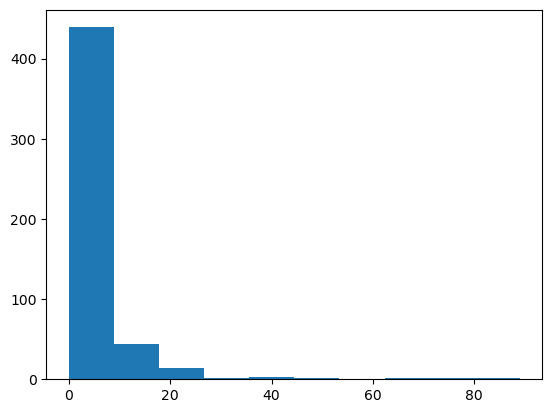

In [50]:
rightSkew = df_boston['CRIM']
plt.hist(rightSkew)

(array([ 18.,   6.,  10.,   2.,   3.,   3.,   7.,  11.,  33., 413.]),
 array([3.20000e-01, 3.99780e+01, 7.96360e+01, 1.19294e+02, 1.58952e+02,
        1.98610e+02, 2.38268e+02, 2.77926e+02, 3.17584e+02, 3.57242e+02,
        3.96900e+02]),
 <BarContainer object of 10 artists>)

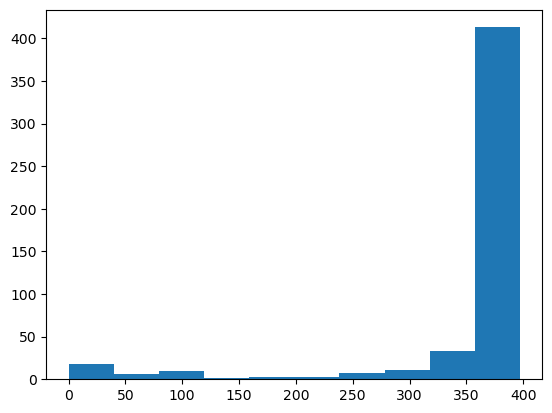

In [41]:
leftSkew = df_boston['B']
plt.hist(leftSkew)

## Q3: Prove your previous result using mean, median and mode.

In [46]:
print('Mean = ', leftSkew.mean())
print('Median = ', leftSkew.median())
print('Mode = ', leftSkew.mode())

Mean =  356.67403162055257
Median =  391.44
Mode =  0    396.9
Name: B, dtype: float64


In [52]:
print('Mean = ', rightSkew.mean())
print('Median = ', rightSkew.median())
print('Mode = ', rightSkew.mode())

Mean =  3.6135235573122535
Median =  0.25651
Mode =  0     0.01501
1    14.33370
Name: CRIM, dtype: float64


In [53]:
print('Mean = ', zeroSkew.mean())
print('Median = ', zeroSkew.median())
print('Mode = ', zeroSkew.mode())

Mean =  6.284634387351787
Median =  6.2085
Mode =  0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
Name: RM, dtype: float64


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [54]:
df_boston.skew(axis=0, skipna=True)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

## Q5: Use numpy to draw normal distribution.

(array([ 12.,  51., 123., 182., 206., 161.,  91.,  52.,  16.,   3.]),
 array([6.45529882, 6.51061608, 6.56593335, 6.62125061, 6.67656788,
        6.73188514, 6.78720241, 6.84251967, 6.89783694, 6.9531542 ,
        7.00847146]),
 <BarContainer object of 10 artists>)

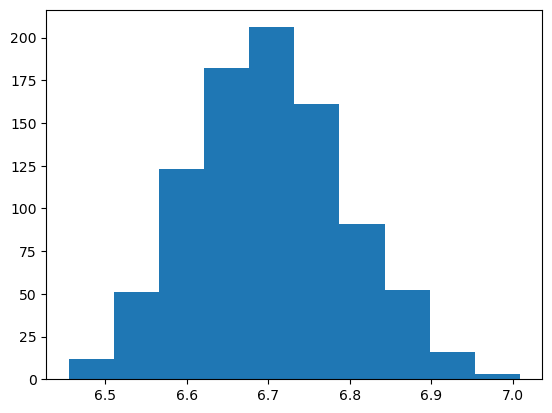

In [37]:
normal = np.random.normal(6.7, .1, 897)
plt.hist(normal)

## Q6: Use numpy to draw uniform distribution.

(array([105.,  95.,  94.,  88., 118.,  98.,  86., 106., 107., 103.]),
 array([0.00339064, 0.10263407, 0.2018775 , 0.30112093, 0.40036436,
        0.49960779, 0.59885121, 0.69809464, 0.79733807, 0.8965815 ,
        0.99582493]),
 <BarContainer object of 10 artists>)

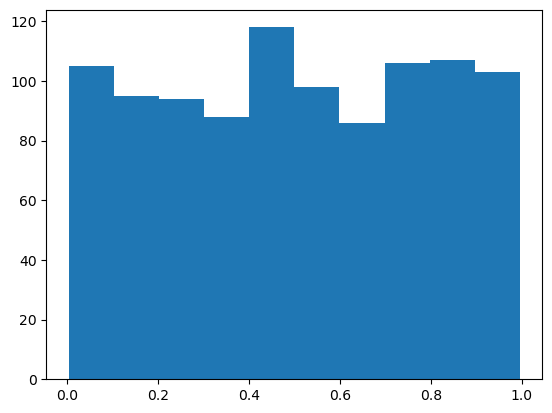

In [31]:
uni = np.random.uniform(size=(1000))
plt.hist(uni)

## Q7: Use numpy to draw binomial distribution.

(array([ 2.,  8., 16., 44., 43., 51., 36., 14.,  4.,  5.]),
 array([ 95. ,  99.3, 103.6, 107.9, 112.2, 116.5, 120.8, 125.1, 129.4,
        133.7, 138. ]),
 <BarContainer object of 10 artists>)

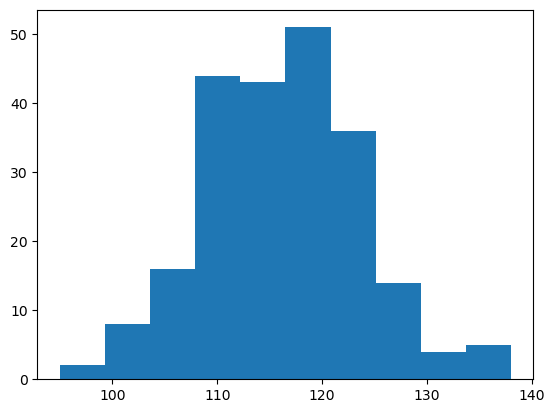

In [56]:
bino = np.random.binomial(232, .5, 223)
;plt.hist(bino)

## Q8: Simulate Two Coin Flips, then draw the result distribution.

play: 1


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

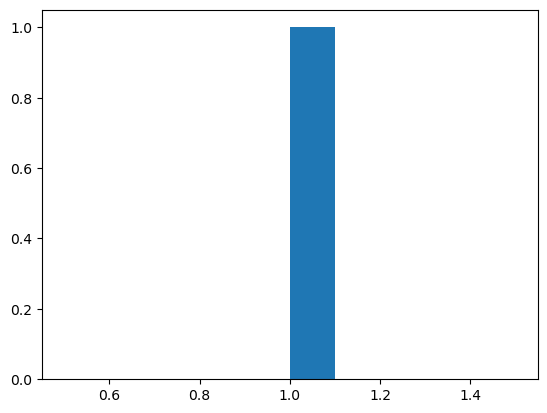

In [101]:
import random

sides = []
head = 0
tail = 0

play = int(input("play: "))

for i in range(play):
    turn = random.randint(0, 1)
    sides.append(turn)
    if play == 0:
        heads += 1
    else:
        tails +=1
plt.hist(sides)